In [6]:
from sys import maxsize
from itertools import permutations

In [7]:
def travellingSalesman(graph, source = 0):
    indicies = [i for i in range(len(graph)) if i != source]
    
    # stores optimal path length 
    minWeight = maxsize
    bestOrder = []
    for i in permutations(indicies):
        weight = 0
        # measures path of "salesman" through an iteration
        position = source
        order = [0]
        for j in i:
            weight += graph[position][j]
            position = j
            order += [j]
        weight += graph[position][source]
        order += [0]
 
        if weight < minWeight:
            minWeight = weight
            bestOrder = order

    return (minWeight, bestOrder)

In [8]:
def weightedMaxCut(graph):
    size = len(graph)
    
    # cuts - divides each index 'particle' into two groups ie. 0 or 1
    maxWeight, cuts = 0, 0
    # iterates through all possible division of particles into two groups
    # note that cases are symmetrical, ie. 1000 are the same groups as 0111 
    for i in range(2**(size-1)):
        # each index in string represents'particle' of group 0 or 1
        binary = bin(i)[2:]
        binary = '0' * (size - len(binary)) + binary 

        # stores current iteration/path weight
        weight = 0

        for j in range(size):
            for k in range(j+1, size):
                weight += graph[j][k] * int(binary[j] != binary[k])

        if maxWeight < weight:
            maxWeight, cuts = weight, binary

        print(weight, binary)

    return maxWeight, cuts

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
def visualize(weights, order, randomSeed=0):
    graph = nx.DiGraph()
    for i in range(len(weights)):
        j = (i + 1) % len(weights)
        graph.add_edge(order[i], order[j], weight=weights[order[i]][order[j]])
    default_axes = plt.axes(frameon=True)
    pos = nx.spring_layout(graph, seed=randomSeed)
    nx.draw_networkx(
        graph, node_size=400, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(graph, "weight")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

In [11]:
# distance between point i and j
weights = [[0, 20, 10, 12],
        [20, 0, 15, 11],
        [10, 15, 0, 17],
        [12, 11, 17, 0]]
# starting point index
source = 0

In [15]:
weight, cut = weightedMaxCut(weights)
print(weight, cut)

0 0000
40 0001
42 0010
48 0011
46 0100
64 0101
58 0110
42 0111
64 0101


Optimised distance: 48 -- Optimised order: [0, 2, 1, 3, 0]


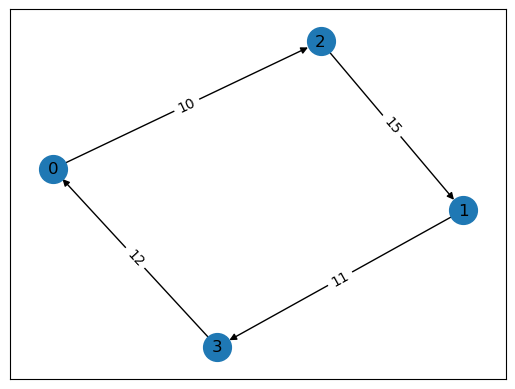

In [12]:
(finalDist, finalOrder) = travellingSalesman(weights, source)
print("Optimised distance: " + str(finalDist) + " -- Optimised order: " + str(finalOrder))
visualize(weights, finalOrder)